<h1><center> CHALLENGE - ALURA VOZ </center></h1>
<h1><center> ETAPA II </center></h1>

Nessa etapa será construído um modelo de machine learning para predição de churn baseado nas informações dos clientes.
Para tal finalidade será realizado alguns ajustes na base de dados, retirando variáveis que foram identificadas como desinteressantes para o aprendizado.

In [49]:
import pandas as pd

In [50]:
dados = pd.read_json('analise_churn.json')

In [51]:
dados.head()

,Identificação,Evasão,Gênero,Maior_65_anos,ParceirX,Dependentes,Meses contratados,Serviço Telefônico,Mais de uma linha,Serviço de Internet,...,Assinatura de Backup,Assinatura de Proteção,Assinatura de Suporte,TV a cabo,Assinatura de Streaming,Tipo de Contrato,Fatura Online,Forma de Pagamento,Mensalidade,Total Gasto
0,0002-ORFBO,Não,Feminino,Menor,Sim,Sim,9,Sim,Não,DSL,...,Sim,Não,Sim,Sim,Não,Anual,Sim,Cheque,65.6,593.3
1,0003-MKNFE,Não,Masculino,Menor,Não,Não,9,Sim,Sim,DSL,...,Não,Não,Não,Não,Sim,Mensal,Não,Cheque,59.9,542.4
2,0004-TLHLJ,Sim,Masculino,Menor,Não,Não,4,Sim,Não,Fibra Ótica,...,Não,Sim,Não,Não,Não,Mensal,Sim,Cheque Eletrônico,73.9,280.85
3,0011-IGKFF,Sim,Masculino,Maior,Sim,Não,13,Sim,Não,Fibra Ótica,...,Sim,Sim,Não,Sim,Sim,Mensal,Sim,Cheque Eletrônico,98.0,1237.85
4,0013-EXCHZ,Sim,Feminino,Maior,Sim,Não,3,Sim,Não,Fibra Ótica,...,Não,Não,Sim,Sim,Não,Mensal,Sim,Cheque,83.9,267.4


## Limpeza da base de dados

As colunas de 'Identificação' e 'Total Gasto' são irrelevantes para o modelo, uma vez que 'Total Gasto' é a multiplicação dos 'Meses contratados' pela 'Mensalidade'. Logo podemos excluir-lás.

In [52]:
dados.drop(columns=['Identificação','Total Gasto'], axis=1, inplace=True)

In [53]:
dados.head()

,Evasão,Gênero,Maior_65_anos,ParceirX,Dependentes,Meses contratados,Serviço Telefônico,Mais de uma linha,Serviço de Internet,Adicional de Segurança,Assinatura de Backup,Assinatura de Proteção,Assinatura de Suporte,TV a cabo,Assinatura de Streaming,Tipo de Contrato,Fatura Online,Forma de Pagamento,Mensalidade
0,Não,Feminino,Menor,Sim,Sim,9,Sim,Não,DSL,Não,Sim,Não,Sim,Sim,Não,Anual,Sim,Cheque,65.6
1,Não,Masculino,Menor,Não,Não,9,Sim,Sim,DSL,Não,Não,Não,Não,Não,Sim,Mensal,Não,Cheque,59.9
2,Sim,Masculino,Menor,Não,Não,4,Sim,Não,Fibra Ótica,Não,Não,Sim,Não,Não,Não,Mensal,Sim,Cheque Eletrônico,73.9
3,Sim,Masculino,Maior,Sim,Não,13,Sim,Não,Fibra Ótica,Não,Sim,Sim,Não,Sim,Sim,Mensal,Sim,Cheque Eletrônico,98.0
4,Sim,Feminino,Maior,Sim,Não,3,Sim,Não,Fibra Ótica,Não,Não,Não,Sim,Sim,Não,Mensal,Sim,Cheque,83.9


### Tradução colunas

In [54]:
colunas = {
    'Evasão':'evasao',
    'Gênero':'genero',
    'Maior_65_anos':'maior_65',
    'ParceirX':'parceiro',
    'Dependentes':'dependente',
    'Meses contratados':'meses_contratados',
    'Serviço Telefônico':'servico_tel',
    'Mais de uma linha':'varias_linhas',
    'Serviço de Internet':'internet',
    'Adicional de Segurança':'seguranca',
    'Assinatura de Backup':'backup',
    'Assinatura de Proteção':'protecao',
    'Assinatura de Suporte':'suporte',
    'TV a cabo':'tv_cabo',
    'Assinatura de Streaming':'streaming',
    'Tipo de Contrato':'contrato',
    'Fatura Online':'fatura_online',
    'Forma de Pagamento':'pagamento',
    'Mensalidade':'mensalidade',
    }

In [55]:
dados = dados.rename(columns=colunas)

In [56]:
dados.head()

,evasao,genero,maior_65,parceiro,dependente,meses_contratados,servico_tel,varias_linhas,internet,seguranca,backup,protecao,suporte,tv_cabo,streaming,contrato,fatura_online,pagamento,mensalidade
0,Não,Feminino,Menor,Sim,Sim,9,Sim,Não,DSL,Não,Sim,Não,Sim,Sim,Não,Anual,Sim,Cheque,65.6
1,Não,Masculino,Menor,Não,Não,9,Sim,Sim,DSL,Não,Não,Não,Não,Não,Sim,Mensal,Não,Cheque,59.9
2,Sim,Masculino,Menor,Não,Não,4,Sim,Não,Fibra Ótica,Não,Não,Sim,Não,Não,Não,Mensal,Sim,Cheque Eletrônico,73.9
3,Sim,Masculino,Maior,Sim,Não,13,Sim,Não,Fibra Ótica,Não,Sim,Sim,Não,Sim,Sim,Mensal,Sim,Cheque Eletrônico,98.0
4,Sim,Feminino,Maior,Sim,Não,3,Sim,Não,Fibra Ótica,Não,Não,Não,Sim,Sim,Não,Mensal,Sim,Cheque,83.9


In [57]:
dados.evasao.replace({'Sim':1,'Não':0},inplace=True)

In [58]:
dados.head()

,evasao,genero,maior_65,parceiro,dependente,meses_contratados,servico_tel,varias_linhas,internet,seguranca,backup,protecao,suporte,tv_cabo,streaming,contrato,fatura_online,pagamento,mensalidade
0,0,Feminino,Menor,Sim,Sim,9,Sim,Não,DSL,Não,Sim,Não,Sim,Sim,Não,Anual,Sim,Cheque,65.6
1,0,Masculino,Menor,Não,Não,9,Sim,Sim,DSL,Não,Não,Não,Não,Não,Sim,Mensal,Não,Cheque,59.9
2,1,Masculino,Menor,Não,Não,4,Sim,Não,Fibra Ótica,Não,Não,Sim,Não,Não,Não,Mensal,Sim,Cheque Eletrônico,73.9
3,1,Masculino,Maior,Sim,Não,13,Sim,Não,Fibra Ótica,Não,Sim,Sim,Não,Sim,Sim,Mensal,Sim,Cheque Eletrônico,98.0
4,1,Feminino,Maior,Sim,Não,3,Sim,Não,Fibra Ótica,Não,Não,Não,Sim,Sim,Não,Mensal,Sim,Cheque,83.9


## Encoding das variáveis categóricas

In [59]:
y = dados['evasao']
X = dados.drop(columns='evasao',axis=1)

In [60]:
X.shape

(7043, 18)

In [61]:
y.shape

(7043,)

In [62]:
dados.columns

Index(['evasao', 'genero', 'maior_65', 'parceiro', 'dependente',
       'meses_contratados', 'servico_tel', 'varias_linhas', 'internet',
       'seguranca', 'backup', 'protecao', 'suporte', 'tv_cabo', 'streaming',
       'contrato', 'fatura_online', 'pagamento', 'mensalidade'],
      dtype='object')

In [63]:
var_categoricas = ['genero','maior_65','parceiro','dependente','servico_tel','varias_linhas','internet',
                  'seguranca','backup','protecao','suporte','tv_cabo',
                   'streaming','contrato','fatura_online','pagamento']

In [64]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [65]:
ohe = make_column_transformer(
    (OneHotEncoder(), var_categoricas),
    remainder='passthrough')

dados_ohe = ohe.fit_transform(X)

In [66]:
dados_ohe = pd.DataFrame(dados_ohe, columns=ohe.get_feature_names_out())
dados_ohe.head()


,onehotencoder__genero_Feminino,onehotencoder__genero_Masculino,onehotencoder__maior_65_Maior,onehotencoder__maior_65_Menor,onehotencoder__parceiro_Não,onehotencoder__parceiro_Sim,onehotencoder__dependente_Não,onehotencoder__dependente_Sim,onehotencoder__servico_tel_Não,onehotencoder__servico_tel_Sim,...,onehotencoder__contrato_Dois anos,onehotencoder__contrato_Mensal,onehotencoder__fatura_online_Não,onehotencoder__fatura_online_Sim,onehotencoder__pagamento_Cheque,onehotencoder__pagamento_Cheque Eletrônico,onehotencoder__pagamento_Crédito,onehotencoder__pagamento_Transferência,remainder__meses_contratados,remainder__mensalidade
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,9.0,65.6
1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,9.0,59.9
2,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,4.0,73.9
3,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,13.0,98.0
4,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,83.9


## Normalização dos dados

In [71]:
from sklearn.preprocessing import MinMaxScaler

In [72]:
scaler = MinMaxScaler()
dados_normalizados = scaler.fit_transform(dados_ohe)
dados_normalizados = pd.DataFrame(dados_normalizados, columns=dados_ohe.columns)

In [73]:
dados_normalizados.head()

,onehotencoder__genero_Feminino,onehotencoder__genero_Masculino,onehotencoder__maior_65_Maior,onehotencoder__maior_65_Menor,onehotencoder__parceiro_Não,onehotencoder__parceiro_Sim,onehotencoder__dependente_Não,onehotencoder__dependente_Sim,onehotencoder__servico_tel_Não,onehotencoder__servico_tel_Sim,...,onehotencoder__contrato_Dois anos,onehotencoder__contrato_Mensal,onehotencoder__fatura_online_Não,onehotencoder__fatura_online_Sim,onehotencoder__pagamento_Cheque,onehotencoder__pagamento_Cheque Eletrônico,onehotencoder__pagamento_Crédito,onehotencoder__pagamento_Transferência,remainder__meses_contratados,remainder__mensalidade
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.125000,0.471144
1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.125000,0.414428
2,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.055556,0.553731
3,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.180556,0.793532
4,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.041667,0.653234


## Separação entre base de treino e teste

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(dados_normalizados, y, random_state=SEED, stratify=y)

## Balanceamento - Oversampling

c:\users\pichau\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='evasao', ylabel='count'>

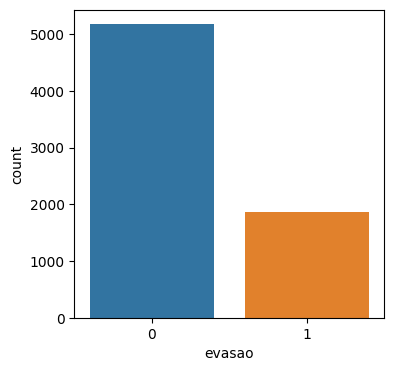

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
sns.countplot(y)

In [77]:
from imblearn.over_sampling import RandomOverSampler

In [78]:
oversampling = RandomOverSampler(random_state=SEED)
X_balanced, y_balanced = oversampling.fit_resample(X_train, y_train)
X_balanced.head()

,onehotencoder__genero_Feminino,onehotencoder__genero_Masculino,onehotencoder__maior_65_Maior,onehotencoder__maior_65_Menor,onehotencoder__parceiro_Não,onehotencoder__parceiro_Sim,onehotencoder__dependente_Não,onehotencoder__dependente_Sim,onehotencoder__servico_tel_Não,onehotencoder__servico_tel_Sim,...,onehotencoder__contrato_Dois anos,onehotencoder__contrato_Mensal,onehotencoder__fatura_online_Não,onehotencoder__fatura_online_Sim,onehotencoder__pagamento_Cheque,onehotencoder__pagamento_Cheque Eletrônico,onehotencoder__pagamento_Crédito,onehotencoder__pagamento_Transferência,remainder__meses_contratados,remainder__mensalidade
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.625000,0.773134
1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.013889,0.510945
2,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.847222,0.678607
3,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.888889,0.869652
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.013889,0.561692


c:\users\pichau\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='evasao', ylabel='count'>

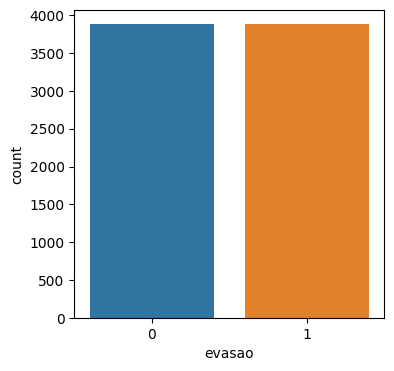

In [79]:
plt.figure(figsize=(4,4))
sns.countplot(y_balanced)

## Modelos - Machine Learning

### Random Forest 

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [81]:
rfc = RandomForestClassifier(random_state=SEED)

In [82]:
rfc.fit(X_balanced,y_balanced)

RandomForestClassifier(random_state=42)

In [83]:
predict_rfc = rfc.predict(X_test)

In [88]:
print(metrics.classification_report(y_test, predict_rfc))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1294
           1       0.58      0.58      0.58       467

    accuracy                           0.78      1761
   macro avg       0.71      0.71      0.71      1761
weighted avg       0.78      0.78      0.78      1761



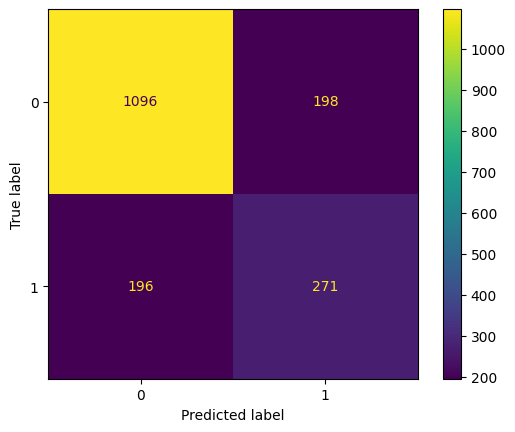

In [91]:
ConfusionMatrixDisplay.from_estimator(rfc, X_test, y_test,)
plt.grid(False)
plt.show()

### SVC

In [92]:
from sklearn.svm import SVC

In [93]:
svc = SVC(random_state=SEED)
svc.fit(X_balanced, y_balanced)

SVC(random_state=42)

In [94]:
predict_svc = svc.predict(X_test)

In [95]:
print(metrics.classification_report(y_test, predict_svc))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1294
           1       0.52      0.78      0.62       467

    accuracy                           0.75      1761
   macro avg       0.71      0.76      0.72      1761
weighted avg       0.80      0.75      0.76      1761



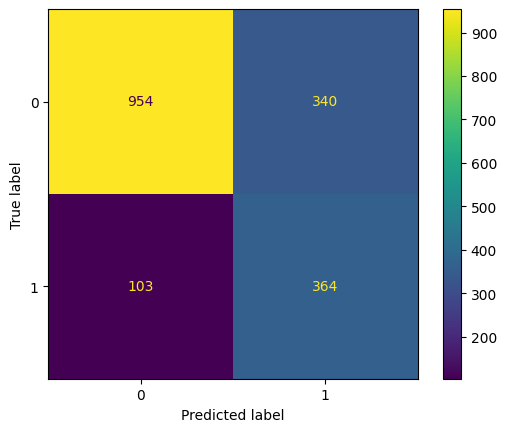

In [96]:
ConfusionMatrixDisplay.from_estimator(svc, X_test, y_test,)
plt.grid(False)
plt.show()

### Logistic Regression

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
lr = LogisticRegression(random_state=SEED)

In [100]:
lr.fit(X_balanced,y_balanced)

LogisticRegression(random_state=42)

In [101]:
predict_lr = lr.predict(X_test)
print(metrics.classification_report(y_test, predict_lr))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1294
           1       0.51      0.79      0.62       467

    accuracy                           0.75      1761
   macro avg       0.71      0.76      0.72      1761
weighted avg       0.80      0.75      0.76      1761



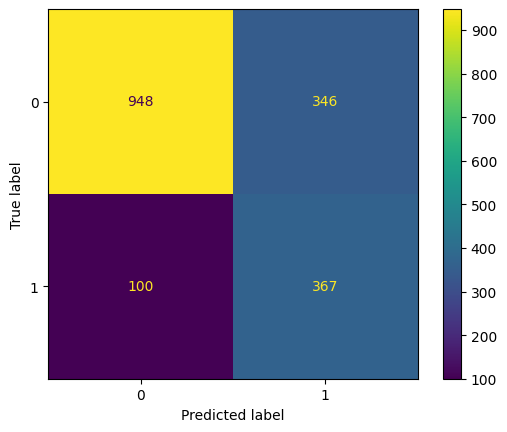

In [102]:
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test,)
plt.grid(False)
plt.show()

Dentre os três modelos propostos, o que teve melhor resultado foi o Random Forest. Entretando, vale ressaltar que a base de dados é pequena o que pode prejudicar no treinamento do modelo.